## Data Wrangling

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats

In [2]:
#retrieving data
parkingdata = pd.read_csv("parking_duration_of_parking_event_vs_street_ID.csv")
parkingdata.shape

(12208178, 13)

In [3]:
parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
0,Banks,MARKET STREET,FLINDERS LANE,FLINDERS STREET,5,1263W,01/10/2011 12:01:10 AM,01/10/2011 12:02:44 AM,94,2P DIS M-SUN 0:00-23:59,0,957,1667
1,Chinatown,RUSSELL STREET,BOURKE STREET,Lt COLLINS STREET,2,742E,01/10/2011 12:01:11 AM,01/10/2011 03:58:20 AM,14229,4P DIS AOT 12:00-7:30,0,1221,525
2,Courtney,ELIZABETH STREET,PELHAM STREET,QUEENSBERRY STREET,2,4744E,01/10/2011 12:01:11 AM,01/10/2011 11:00:19 AM,39548,2P DIS M-SUN 0:00-23:59,1,627,3202
3,Princes Theatre,EXHIBITION STREET,Lt BOURKE STREET,BOURKE STREET,2,452E,01/10/2011 12:01:13 AM,01/10/2011 12:37:42 AM,2189,2P DIS M-SUN 0:00-23:59,0,647,201
4,Princes Theatre,EXHIBITION STREET,BOURKE STREET,Lt COLLINS STREET,5,429W,01/10/2011 12:01:14 AM,01/10/2011 05:28:10 AM,19616,TKT AREA M-SUN 0:00 - 7:30,0,647,176


In [4]:
parkingdata.tail(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
12208173,Chinatown,RUSSELL STREET,Lt BOURKE STREET,BOURKE STREET,2,770E,30/09/2012 11:47:56 PM,30/09/2012 11:57:52 PM,596,2P DIS M-SUN 0:00-23:59,0,1221,7815
12208174,Chinatown,RUSSELL STREET,BOURKE STREET,Lt COLLINS STREET,5,765W,30/09/2012 11:48:34 PM,30/09/2012 11:50:02 PM,88,2P DIS M-SUN 0:00-23:59,0,1221,689
12208175,City Square,FLINDERS LANE,ELIZABETH STREET,SWANSTON STREET,4,1777S,30/09/2012 11:48:41 PM,30/09/2012 11:51:57 PM,196,2P DIS M-SUN 0:00-23:59,0,669,6758
12208176,City Square,FLINDERS LANE,ELIZABETH STREET,SWANSTON STREET,4,1775S,30/09/2012 11:49:43 PM,30/09/2012 11:52:54 PM,191,2P DIS M-SUN 0:00-23:59,0,669,1407
12208177,Princes Theatre,LONSDALE STREET,RUSSELL STREET,EXHIBITION STREET,4,2843S,30/09/2012 11:52:29 PM,30/09/2012 11:59:00 PM,391,2P DIS AOT 0:00-23:59,0,894,6954


In [5]:
#checking the datatype of all the features
parkingdata.dtypes

Area Name                                 object
Street Name                               object
Between Street 1                          object
Between Street 2                          object
Side Of Street                             int64
Street Marker                             object
Arrival Time                              object
Departure Time                            object
Duration of Parking Event (in seconds)     int64
Sign                                      object
In Violation?                              int64
Street ID                                  int64
Device ID                                  int64
dtype: object

In [6]:
#Checking values of Area Name feature for typos
parkingdata['Area Name'].value_counts()

Queensberry        1251600
Princes Theatre     904186
Victoria Market     845505
Regency             774955
Southbank           772985
The Mac             748260
Hyatt               718992
Titles              684197
Rialto              544591
City Square         527002
County              518606
Hardware            499803
Chinatown           482723
Courtney            473033
Magistrates         456578
Banks               446577
Spencer             444369
RACV                395147
Jolimont            353732
Supreme             235165
Tavistock            64306
Docklands            62753
West Melbourne        3113
Name: Area Name, dtype: int64

In [7]:
#Converting all the feature attributes to uppercase for uniformity

parkingdata['Area Name'] = parkingdata['Area Name'].str.upper()
parkingdata['Street Name'] = parkingdata['Street Name'].str.upper()
parkingdata['Between Street 1'] = parkingdata['Between Street 1'].str.upper()
parkingdata['Between Street 2'] = parkingdata['Between Street 2'].str.upper()
parkingdata['Street Marker'] = parkingdata['Street Marker'].str.upper()
parkingdata['Sign'] = parkingdata['Sign'].str.upper()

parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
0,BANKS,MARKET STREET,FLINDERS LANE,FLINDERS STREET,5,1263W,01/10/2011 12:01:10 AM,01/10/2011 12:02:44 AM,94,2P DIS M-SUN 0:00-23:59,0,957,1667
1,CHINATOWN,RUSSELL STREET,BOURKE STREET,LT COLLINS STREET,2,742E,01/10/2011 12:01:11 AM,01/10/2011 03:58:20 AM,14229,4P DIS AOT 12:00-7:30,0,1221,525
2,COURTNEY,ELIZABETH STREET,PELHAM STREET,QUEENSBERRY STREET,2,4744E,01/10/2011 12:01:11 AM,01/10/2011 11:00:19 AM,39548,2P DIS M-SUN 0:00-23:59,1,627,3202
3,PRINCES THEATRE,EXHIBITION STREET,LT BOURKE STREET,BOURKE STREET,2,452E,01/10/2011 12:01:13 AM,01/10/2011 12:37:42 AM,2189,2P DIS M-SUN 0:00-23:59,0,647,201
4,PRINCES THEATRE,EXHIBITION STREET,BOURKE STREET,LT COLLINS STREET,5,429W,01/10/2011 12:01:14 AM,01/10/2011 05:28:10 AM,19616,TKT AREA M-SUN 0:00 - 7:30,0,647,176


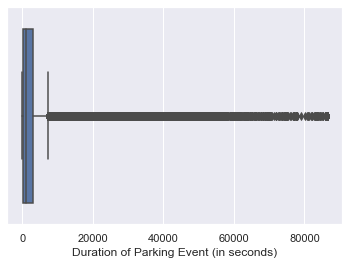

In [8]:
sns.boxplot(parkingdata['Duration of Parking Event (in seconds)'])


In [9]:
#Removing all redundant extra whitespaces
for x in parkingdata.columns:
    if parkingdata[x].dtype == object:
        parkingdata[x] = parkingdata[x].str.strip()

In [10]:
#Checking values of Street Name feature for typos
pd.set_option('display.max_rows', 10000)
parkingdata['Street Name'].value_counts()

LONSDALE STREET             1170701
QUEEN STREET                 919635
LA TROBE STREET              711087
EXHIBITION STREET            698729
FRANKLIN STREET              654323
COLLINS STREET               647132
ELIZABETH STREET             613469
RUSSELL STREET               577396
BOURKE STREET                517495
LT LONSDALE STREET           423729
LT COLLINS STREET            348809
FLINDERS LANE                331505
SPRING STREET                330752
KING STREET                  319001
ERROL STREET                 283772
WILLIAM STREET               248484
LT BOURKE STREET             219680
COVENTRY STREET              207415
A'BECKETT STREET             187942
VICTORIA STREET              176841
FLINDERS STREET              161533
SPENCER STREET               159248
QUEENSBERRY STREET           144009
CAPEL STREET                 134440
ALBERT STREET                117240
THERRY STREET                114355
GRANT STREET                 109481
DORCAS STREET               

In [11]:
#Checking values of Between Street 1 feature for typos
parkingdata['Between Street 1'].value_counts()

KING STREET            1092126
QUEEN STREET            994427
WILLIAM STREET          788501
QUEENSBERRY STREET      777738
RUSSELL STREET          669756
SPENCER STREET          590755
SWANSTON STREET         578673
EXHIBITION STREET       560815
LT LONSDALE STREET      522588
LONSDALE STREET         446584
LT COLLINS STREET       433952
VICTORIA STREET         389997
BOURKE STREET           351575
COLLINS STREET          345125
ELIZABETH STREET        307663
LT BOURKE STREET        303134
FLINDERS LANE           250787
LA TROBE STREET         211338
WILLAM STREET           179089
THERRY STREET           172820
FRANKLIN STREET         162448
A'BECKETT STREET        159214
WELLS STREET            151318
DODDS STREET            126450
STURT STREET            112675
FLINDERS STREET         110245
SOUTHBANK BOULEVARD     107872
O'CONNELL STREET        104972
ERROL STREET            104254
KINGS WAY                99103
HOWARD STREET            73206
PELHAM STREET            70120
BALSTON 

In [12]:
#Checking values of Between Street 1 feature for typos
parkingdata['Between Street 2'].value_counts()

WILLIAM STREET         1054440
ELIZABETH STREET       1022481
VICTORIA STREET         995084
QUEEN STREET            952430
EXHIBITION STREET       656965
KING STREET             590755
SPRING STREET           562633
LONSDALE STREET         550299
RUSSELL STREET          484149
FLINDERS LANE           455370
LT BOURKE STREET        446584
COLLINS STREET          433952
LT COLLINS STREET       351575
SWANSTON STREET         307663
LA TROBE STREET         305703
BOURKE STREET           303134
FLINDERS STREET         250787
LT LONSDALE STREET      248672
DODDS STREET            180344
FRANKLIN STREET         172820
ST KILDA ROAD           151318
LANSDOWNE STREET        113303
QUEENSBERRY STREET      109616
LEVESON STREET          104254
POWER STREET             97115
A'BECKETT STREET         92632
WELLS STREET             89301
THERRY STREET            81256
WALSH STREET             76459
HAWKE STREET             66209
CAPEL STREET             65198
STURT STREET             60011
MILES ST

In [13]:
#check which columns have missing values
parkingdata.columns[parkingdata.isnull().any()]

Index([], dtype='object')

In [14]:
#converting object to datetime
parkingdata['Arrival Time'] = pd.to_datetime(parkingdata['Arrival Time'])
parkingdata['Departure Time'] = pd.to_datetime(parkingdata['Departure Time'])

In [15]:
#check if object has successfully been converted to datetime
parkingdata.dtypes

Area Name                                         object
Street Name                                       object
Between Street 1                                  object
Between Street 2                                  object
Side Of Street                                     int64
Street Marker                                     object
Arrival Time                              datetime64[ns]
Departure Time                            datetime64[ns]
Duration of Parking Event (in seconds)             int64
Sign                                              object
In Violation?                                      int64
Street ID                                          int64
Device ID                                          int64
dtype: object

In [16]:
parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
0,BANKS,MARKET STREET,FLINDERS LANE,FLINDERS STREET,5,1263W,2011-01-10 00:01:10,2011-01-10 00:02:44,94,2P DIS M-SUN 0:00-23:59,0,957,1667
1,CHINATOWN,RUSSELL STREET,BOURKE STREET,LT COLLINS STREET,2,742E,2011-01-10 00:01:11,2011-01-10 03:58:20,14229,4P DIS AOT 12:00-7:30,0,1221,525
2,COURTNEY,ELIZABETH STREET,PELHAM STREET,QUEENSBERRY STREET,2,4744E,2011-01-10 00:01:11,2011-01-10 11:00:19,39548,2P DIS M-SUN 0:00-23:59,1,627,3202
3,PRINCES THEATRE,EXHIBITION STREET,LT BOURKE STREET,BOURKE STREET,2,452E,2011-01-10 00:01:13,2011-01-10 00:37:42,2189,2P DIS M-SUN 0:00-23:59,0,647,201
4,PRINCES THEATRE,EXHIBITION STREET,BOURKE STREET,LT COLLINS STREET,5,429W,2011-01-10 00:01:14,2011-01-10 05:28:10,19616,TKT AREA M-SUN 0:00 - 7:30,0,647,176


In [17]:
parkingdata.tail(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
12208173,CHINATOWN,RUSSELL STREET,LT BOURKE STREET,BOURKE STREET,2,770E,2012-09-30 23:47:56,2012-09-30 23:57:52,596,2P DIS M-SUN 0:00-23:59,0,1221,7815
12208174,CHINATOWN,RUSSELL STREET,BOURKE STREET,LT COLLINS STREET,5,765W,2012-09-30 23:48:34,2012-09-30 23:50:02,88,2P DIS M-SUN 0:00-23:59,0,1221,689
12208175,CITY SQUARE,FLINDERS LANE,ELIZABETH STREET,SWANSTON STREET,4,1777S,2012-09-30 23:48:41,2012-09-30 23:51:57,196,2P DIS M-SUN 0:00-23:59,0,669,6758
12208176,CITY SQUARE,FLINDERS LANE,ELIZABETH STREET,SWANSTON STREET,4,1775S,2012-09-30 23:49:43,2012-09-30 23:52:54,191,2P DIS M-SUN 0:00-23:59,0,669,1407
12208177,PRINCES THEATRE,LONSDALE STREET,RUSSELL STREET,EXHIBITION STREET,4,2843S,2012-09-30 23:52:29,2012-09-30 23:59:00,391,2P DIS AOT 0:00-23:59,0,894,6954


## Data Visualisation

### 1. Most popular parking street in 4 hour interval

In [18]:
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

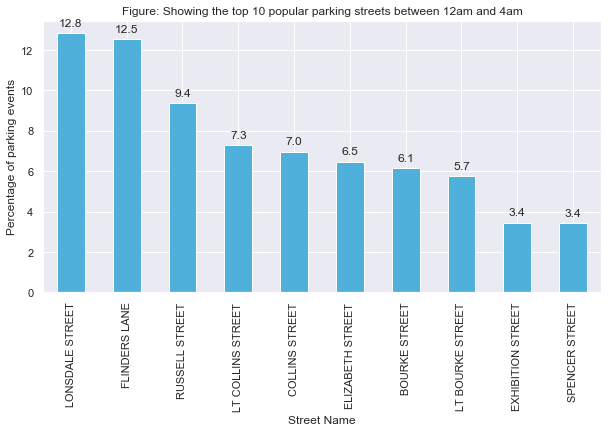

In [19]:
mask = (parkingdata['Arrival Time'].dt.hour >= 0) & (parkingdata['Arrival Time'].dt.hour <= 3)
between0and4 = parkingdata.loc[mask]
mostPopular = between0and4['Street Name'].value_counts(normalize=True)*100
mostPopularSorted = mostPopular.sort_values(ascending=False).head(10)
ax = mostPopularSorted.T.plot(kind = 'bar', color='#4EB0DB', figsize=(10,5))
ax.set_title('Figure: Showing the top 10 popular parking streets between 12am and 4am')
ax.set_xlabel('Street Name')
ax.set_ylabel('Percentage of parking events')
add_value_labels(ax)

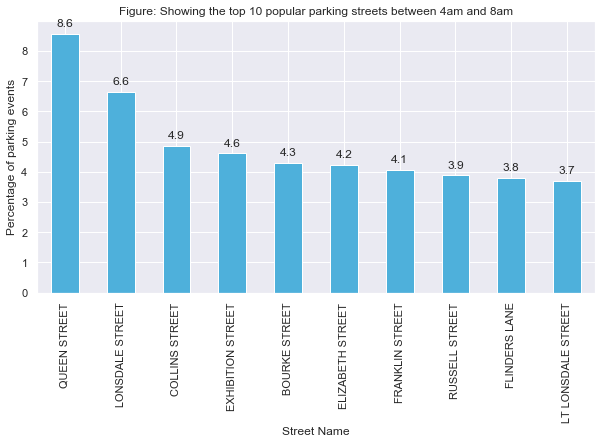

In [20]:
mask = (parkingdata['Arrival Time'].dt.hour >= 4) & (parkingdata['Arrival Time'].dt.hour <= 7)
between4and8 = parkingdata.loc[mask]
mostPopular = between4and8['Street Name'].value_counts(normalize=True)*100
mostPopularSorted = mostPopular.sort_values(ascending=False).head(10)
ax = mostPopularSorted.T.plot(kind = 'bar', color='#4EB0DB', figsize=(10,5))
ax.set_title('Figure: Showing the top 10 popular parking streets between 4am and 8am')
ax.set_xlabel('Street Name')
ax.set_ylabel('Percentage of parking events')
add_value_labels(ax)

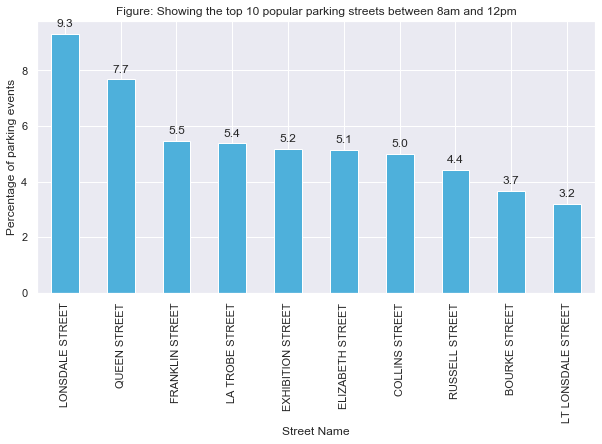

In [21]:
mask = (parkingdata['Arrival Time'].dt.hour >= 8) & (parkingdata['Arrival Time'].dt.hour <= 11)
between8and12 = parkingdata.loc[mask]
mostPopular = between8and12['Street Name'].value_counts(normalize=True)*100
mostPopularSorted = mostPopular.sort_values(ascending=False).head(10)
ax = mostPopularSorted.T.plot(kind = 'bar', color='#4EB0DB', figsize=(10,5))
ax.set_title('Figure: Showing the top 10 popular parking streets between 8am and 12pm')
ax.set_xlabel('Street Name')
ax.set_ylabel('Percentage of parking events')
add_value_labels(ax)

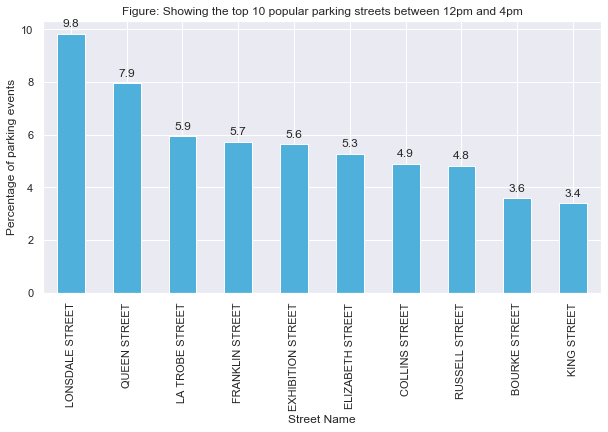

In [22]:
mask = (parkingdata['Arrival Time'].dt.hour >= 12) & (parkingdata['Arrival Time'].dt.hour <= 15)
between12and16 = parkingdata.loc[mask]
mostPopular = between12and16['Street Name'].value_counts(normalize=True)*100
mostPopularSorted = mostPopular.sort_values(ascending=False).head(10)
ax = mostPopularSorted.T.plot(kind = 'bar', color='#4EB0DB', figsize=(10,5))
ax.set_title('Figure: Showing the top 10 popular parking streets between 12pm and 4pm')
ax.set_xlabel('Street Name')
ax.set_ylabel('Percentage of parking events')
add_value_labels(ax)

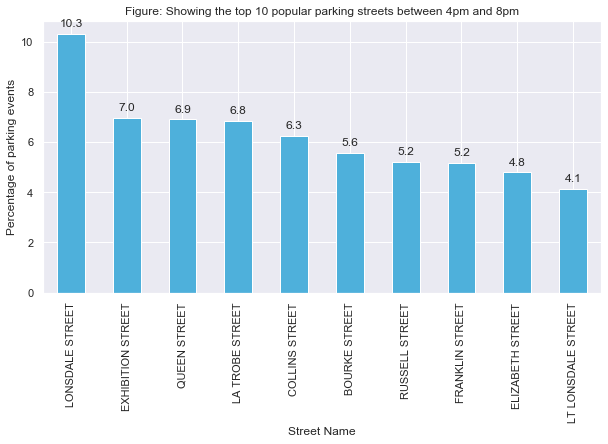

In [23]:
mask = (parkingdata['Arrival Time'].dt.hour >= 16) & (parkingdata['Arrival Time'].dt.hour <= 19)
between16and20 = parkingdata.loc[mask]
mostPopular = between16and20['Street Name'].value_counts(normalize=True)*100
mostPopularSorted = mostPopular.sort_values(ascending=False).head(10)
ax = mostPopularSorted.T.plot(kind = 'bar', color='#4EB0DB', figsize=(10,5))
ax.set_title('Figure: Showing the top 10 popular parking streets between 4pm and 8pm')
ax.set_xlabel('Street Name')
ax.set_ylabel('Percentage of parking events')
add_value_labels(ax)

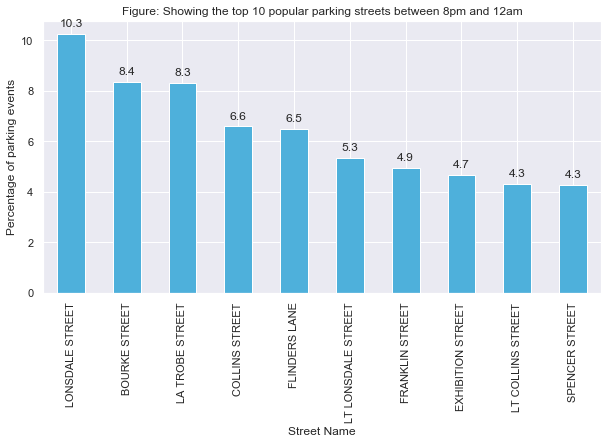

In [24]:
mask = (parkingdata['Arrival Time'].dt.hour >= 20) & (parkingdata['Arrival Time'].dt.hour <= 23)
between20and00 = parkingdata.loc[mask]
mostPopular = between20and00['Street Name'].value_counts(normalize=True)*100
mostPopularSorted = mostPopular.sort_values(ascending=False).head(10)
ax = mostPopularSorted.T.plot(kind = 'bar', color='#4EB0DB', figsize=(10,5))
ax.set_title('Figure: Showing the top 10 popular parking streets between 8pm and 12am')
ax.set_xlabel('Street Name')
ax.set_ylabel('Percentage of parking events')
add_value_labels(ax)

### 2. Most popular parking area in 4 hour interval

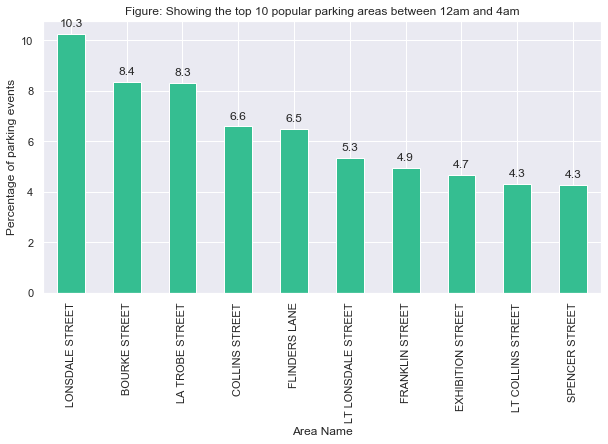

In [25]:
mask = (parkingdata['Arrival Time'].dt.hour >= 0) & (parkingdata['Arrival Time'].dt.hour <= 3)
between0and4 = parkingdata.loc[mask]
mostPopular = between0and4['Area Name'].value_counts(normalize=True)*100
ax = mostPopularSorted.T.plot(kind = 'bar', color='#35BE91', figsize=(10,5))
ax.set_title('Figure: Showing the top 10 popular parking areas between 12am and 4am')
ax.set_xlabel('Area Name')
ax.set_ylabel('Percentage of parking events')
add_value_labels(ax)

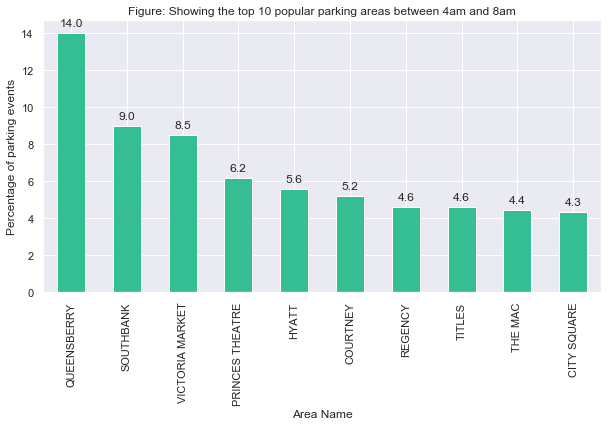

In [26]:
mask = (parkingdata['Arrival Time'].dt.hour >= 4) & (parkingdata['Arrival Time'].dt.hour <= 7)
between4and8 = parkingdata.loc[mask]
mostPopular = between4and8['Area Name'].value_counts(normalize=True)*100
mostPopularSorted = mostPopular.sort_values(ascending=False).head(10)
ax = mostPopularSorted.T.plot(kind = 'bar', color='#35BE91', figsize=(10,5))
ax.set_title('Figure: Showing the top 10 popular parking areas between 4am and 8am')
ax.set_xlabel('Area Name')
ax.set_ylabel('Percentage of parking events')
add_value_labels(ax)

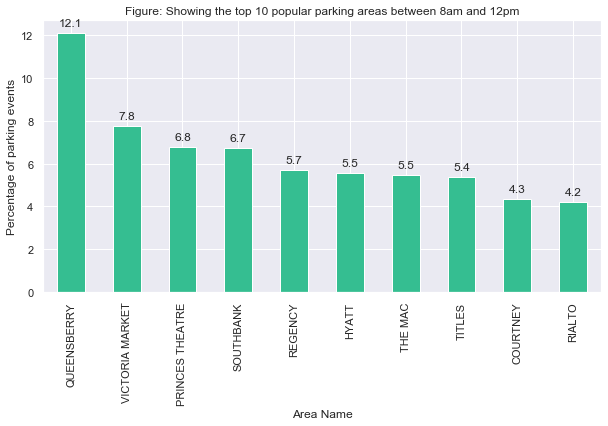

In [27]:
mask = (parkingdata['Arrival Time'].dt.hour >= 8) & (parkingdata['Arrival Time'].dt.hour <= 11)
between8and12 = parkingdata.loc[mask]
mostPopular = between8and12['Area Name'].value_counts(normalize=True)*100
mostPopularSorted = mostPopular.sort_values(ascending=False).head(10)
ax = mostPopularSorted.T.plot(kind = 'bar', color='#35BE91', figsize=(10,5))
ax.set_title('Figure: Showing the top 10 popular parking areas between 8am and 12pm')
ax.set_xlabel('Area Name')
ax.set_ylabel('Percentage of parking events')
add_value_labels(ax)

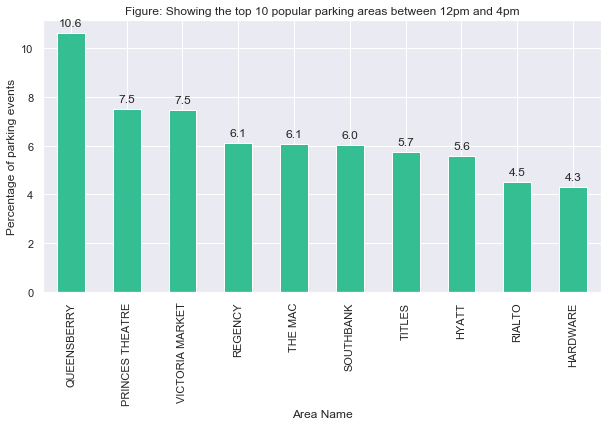

In [28]:
mask = (parkingdata['Arrival Time'].dt.hour >= 12) & (parkingdata['Arrival Time'].dt.hour <= 15)
between12and16 = parkingdata.loc[mask]
mostPopular = between12and16['Area Name'].value_counts(normalize=True)*100
mostPopularSorted = mostPopular.sort_values(ascending=False).head(10)
ax = mostPopularSorted.T.plot(kind = 'bar', color='#35BE91', figsize=(10,5))
ax.set_title('Figure: Showing the top 10 popular parking areas between 12pm and 4pm')
ax.set_xlabel('Area Name')
ax.set_ylabel('Percentage of parking events')
add_value_labels(ax)

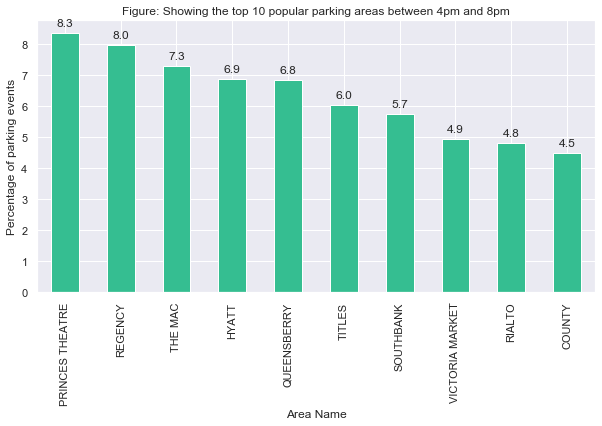

In [29]:
mask = (parkingdata['Arrival Time'].dt.hour >= 16) & (parkingdata['Arrival Time'].dt.hour <= 19)
between16and20 = parkingdata.loc[mask]
mostPopular = between16and20['Area Name'].value_counts(normalize=True)*100
mostPopularSorted = mostPopular.sort_values(ascending=False).head(10)
ax = mostPopularSorted.T.plot(kind = 'bar', color='#35BE91', figsize=(10,5))
ax.set_title('Figure: Showing the top 10 popular parking areas between 4pm and 8pm')
ax.set_xlabel('Area Name')
ax.set_ylabel('Percentage of parking events')
add_value_labels(ax)

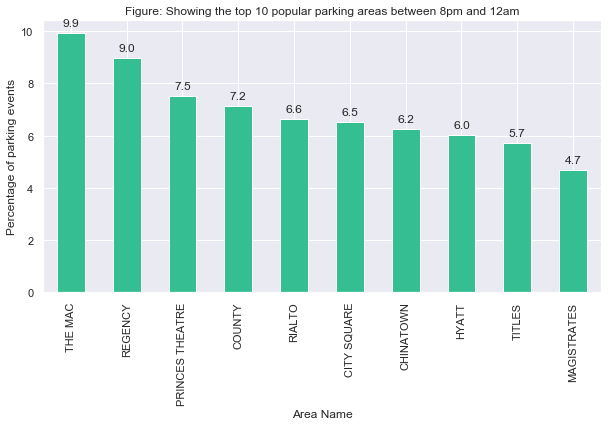

In [30]:
mask = (parkingdata['Arrival Time'].dt.hour >= 20) & (parkingdata['Arrival Time'].dt.hour <= 23)
between20and00 = parkingdata.loc[mask]
mostPopular = between20and00['Area Name'].value_counts(normalize=True)*100
mostPopularSorted = mostPopular.sort_values(ascending=False).head(10)
ax = mostPopularSorted.T.plot(kind = 'bar',color='#35BE91', figsize=(10,5))
ax.set_title('Figure: Showing the top 10 popular parking areas between 8pm and 12am')
ax.set_xlabel('Area Name')
ax.set_ylabel('Percentage of parking events')
add_value_labels(ax)

In [35]:
# make a copy of the data frame that contain onlt rows where violation == 1
violationEvents = parkingdata[parkingdata['In Violation?'] == 1].copy()

In [36]:
# check if all columns have been copied
violationEvents.columns

Index(['Area Name', 'Street Name', 'Between Street 1', 'Between Street 2',
       'Side Of Street', 'Street Marker', 'Arrival Time', 'Departure Time',
       'Duration of Parking Event (in seconds)', 'Sign', 'In Violation?',
       'Street ID', 'Device ID'],
      dtype='object')

In [37]:
# check that the column should only have value = 1
violationEvents['In Violation?'].value_counts()

1    1668506
Name: In Violation?, dtype: int64

In [38]:
violationEvents['Sign'].value_counts()

1P MTR M-SAT 7:30-19:30                   411584
1/2P MTR M-SAT 7:30-19:30                 133125
2P MTR M-SAT 7:30-20:30                    92177
1P SUN 7:30-18:30                          72707
1/2P M-SAT 7:30-19:30                      56923
1P TKT A M-SAT 7:30-19:30                  40724
1P TKT A M-F 7:30-18:30                    36831
2P SUN 7:30-18:30                          35392
2P TKT A M-SAT 7:30-20:30                  27352
2P TKT A M-F 7:30-18:30                    26065
2P DIS M-SUN 0:00-23:59                    21594
1P TKT A RPA M-F 7:30-18:30                20828
4P MTR M-F 7:30-18:30                      17515
CW TOW M-F 16:00-18:30                     15670
1P M-F 7:30-18:30                          14570
1P MTR M-SAT 7:30-18:30                    14456
1P MTR M-SAT 6:00-19:30                    14307
1/4P M-F 7:30-18:30                        13396
1/2P TKT A M-SAT 7:30-19:30                13036
1/4P M-SAT 7:30-19:30                      12364
1P MTR M-F 7:30-16:0

In [ ]:
# Create a new column called based on the value of another column
# np.where assigns True if gapminder.lifeExp>=50 
violationEvents['Sign P'] = np.where(violationEvents['Sign'] == '1P%' or '1/2P' or '2P','4P','','', True, False)
